# ENSF 614 Mini-Project: Kaggle Titanic Competition
Author: Gregory Slowski
Submission Date: December 6, 2021

Parts of this notebook have been adapted from University of Calgary's Dr. Pauchards ENSF 611 Fall 2021 course delivery including Lectures W05, W07, W11, as well as assignment notebook 3.


In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load data
A pre-split data set is provided with the Kaggle competition. Both the training set and the test set will be loaded individually.
https://www.kaggle.com/c/titanic/data



### 1.1 Prepare the feature matrix and target vector

Importing both sets using pandas read_csv, both are stored as Pandas dataframes. 

In [310]:
training_data = pd.read_csv(r'.\TitanicData\train.csv')
X_test = pd.read_csv(r'.\TitanicData\test.csv')

print("Shape of training data: {} \t\t Type of training data: {}".format(training_data.shape, type(training_data)))
print("Shape of test data: {} \t\t Type of test data: {}".format(X_test.shape, type(X_test)))

Shape of training data: (891, 12) 		 Type of training data: <class 'pandas.core.frame.DataFrame'>
Shape of test data: (418, 11) 		 Type of test data: <class 'pandas.core.frame.DataFrame'>


In [311]:
# We see that the training data includes an additional column as that is the target. We will split this into feature matrix, X_train, and target, y_train.

training_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [312]:
X_train = training_data.drop(columns="Survived")
y_train = training_data["Survived"]

print("Shape of feature matrix: {} \t\t Type of feature matrix: {}".format(X_train.shape, type(X_train)))
print("Shape of target: {} \t\t Type of target: {}".format(y_train.shape, type(y_train)))
print(X_train.columns)

Shape of feature matrix: (891, 11) 		 Type of feature matrix: <class 'pandas.core.frame.DataFrame'>
Shape of target: (891,) 		 Type of target: <class 'pandas.core.series.Series'>
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## 2. Inspect the data 

First we just want to look at what type of data we have in the original array.


In [313]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that age isnt quite filled out, cabin is missing many values, and embarked is only missing 2 from the full set.

In [314]:
# we will then check the types of values we have for each row by inspecting the header for the data.

training_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [315]:
print(f"Number of unique cabin occurences: {training_data['Cabin'].unique().size} out of {training_data['Cabin'].notnull().sum()}")
print(f"Number of unique name occurences: {training_data['Name'].unique().size} out of {training_data['Name'].notnull().sum()}")
print(f"Number of unique ticket occurences: {training_data['Ticket'].unique().size} out of {training_data['Ticket'].notnull().sum()}")

Number of unique cabin occurences: 148 out of 204
Number of unique name occurences: 891 out of 891
Number of unique ticket occurences: 681 out of 891


Name, ticket number, and cabin seem at least mostly unique, indicating they are not useful for predicting anything. Therefore we will drop those columns in both the training and test sets.

PassengerId will be dropped from the training set, while dropped and stored from the test set for identification with testing.

In [316]:
X_train = X_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_passenger_ids = X_test['PassengerId']
X_test = X_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

print("Shape of training feature matrix: {}".format(X_train.shape))
print("Shape of test data: {}".format(X_test.shape))

Shape of training feature matrix: (891, 7)
Shape of test data: (418, 7)


In [317]:
# Now lets have another look at the data:

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [318]:
X_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [319]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Going forward it makes sense to treat obviously Pclass, Sex and Embarked as categorical.

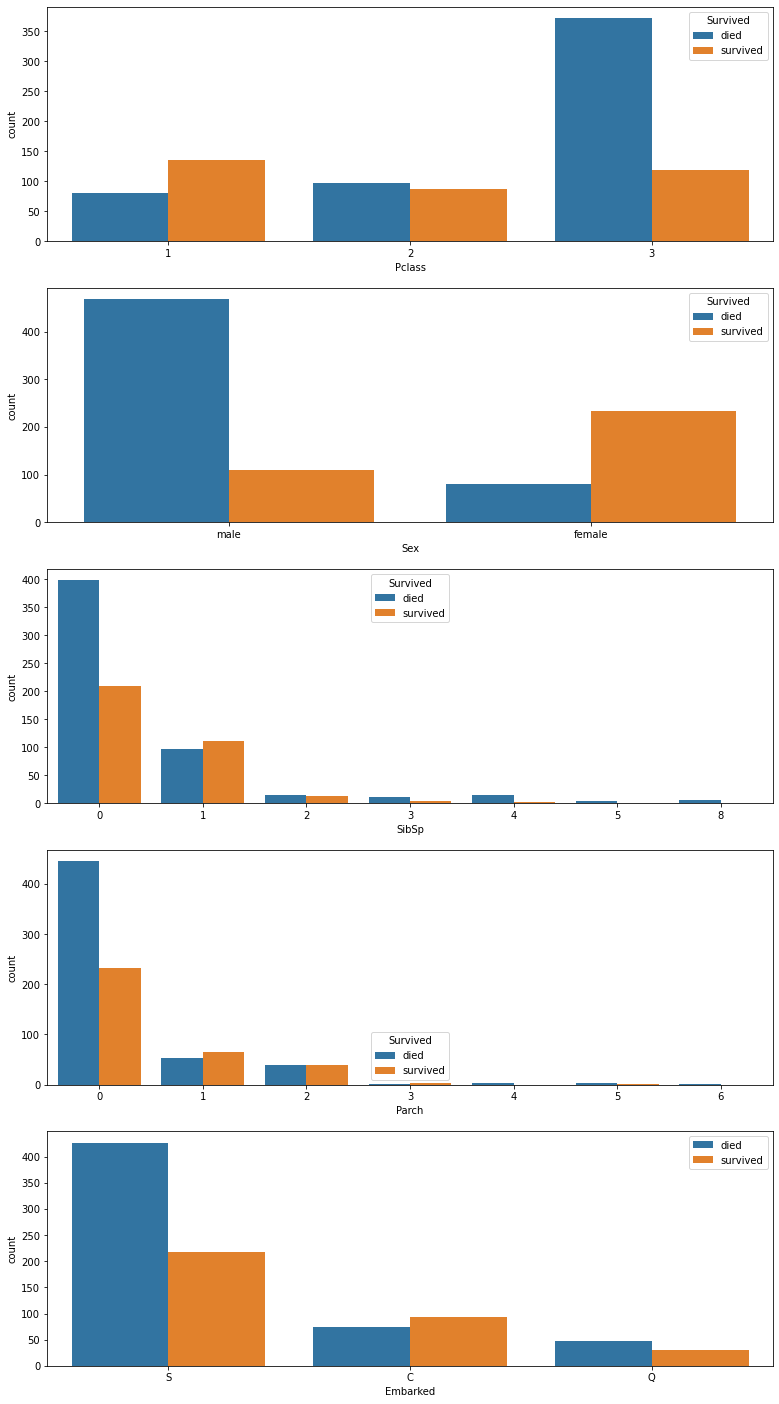

In [320]:
# 2.1 Relationship between features and target classes

# A barplot is created for each of the feature columns in `X_train` using  `y_train` as hue, 
# where the features can be reasonably broken down to a bar plot, ie. either categorical or numeric with limited options.

key_values_y_train = y_train.map({0: "died", 1: "survived"})

fig, axes = plt.subplots(5, 1, figsize=(13, 25))

sns.countplot(x = "Pclass", hue=key_values_y_train, data=X_train, ax=axes[0])
sns.countplot(x = "Sex", hue=key_values_y_train, data=X_train, ax=axes[1])
sns.countplot(x = "SibSp", hue=key_values_y_train, data=X_train, ax=axes[2])
sns.countplot(x = "Parch", hue=key_values_y_train, data=X_train, ax=axes[3])
sns.countplot(x = "Embarked", hue=key_values_y_train, data=X_train, ax=axes[4])

plt.legend(loc='upper right')

plt.show()


### Some thoughts on the dataset:
1. We see that 7 features remain relevant to whether someone may have died or not. 3 of these we will consider categorical, 4 of them quantitative.
2. Some imputing will need to be done on a few of the columns which appears to be relatively minor as not too many elements will be inputed as a whole.
3. Initial factors of significance contributing to deaths appear to be things like:
    - being in class 3
    - being male
    - travelling alone
    - being part of a large family (ie. many children or many siblings)
    - having embarked from Southampton and to lesser extent Queenstown


## 3. Preprocessing using pipeline

### 3.1 Imputing and encoding columns by pipeline

In [399]:
# for numeric values we will simply use the average to impute values then apply a standard scaler
# for categorical we will use the most frequent occurence to impute values, then apply a onehotencoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
numerical_imputer = SimpleImputer(strategy='mean')
numerical_scaler = StandardScaler()

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_onehot = OneHotEncoder(handle_unknown='ignore')

numeric_transformer = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', numerical_scaler)])

categorical_transformer = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('onehot', categorical_onehot)])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)])

In [400]:
# below we can see how our inputs are preprocessed
from sklearn import set_config
set_config(display='diagram')
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare', 'SibSp', 'Parch']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

## 4. Grid search utilizing pre-processing and various ML models

In [422]:
# LogisticRegression() is used simply as a placeholder as we will be trying different classfiers in the parameter grid for the grid search.

from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([('preprocessing', preprocessor), ('featureEng', PolynomialFeatures(degree=2, interaction_only=True)),
                 ('classifier', LogisticRegression())])
pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('featureEng', PolynomialFeatures(interaction_only=True)),
                ('classifier', LogisticRegression())])

In [429]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

param_grid = [{'classifier': [LogisticRegression(max_iter=10000, random_state=11)],
            'classifier__C': [0.1, 1.0, 10., 100.]},
              
              {'classifier': [GradientBoostingClassifier(random_state=11)],
            'classifier__learning_rate': [0.01, 0.1, 1.0],
            'classifier__max_depth': [1, 3, 5]},
              
              {'classifier': [LinearSVC(random_state=11, max_iter=1000000)],
            'classifier__C': [0.01, 1., 100.]},
              
              {'classifier': [SVC(random_state=11)],
            'classifier__C': [0.01, 0.1, 1.0],
            'classifier__gamma': [0.01, 1, 100.0]},
              
              {'classifier': [RandomForestClassifier(random_state=11)],
            'classifier__n_estimators': [10, 100, 1000],
            'classifier__max_depth': [1, 3, 5, 7]},
              
              {'classifier': [KNeighborsClassifier()],
            'classifier__n_neighbors': [3, 5, 7, 9, 11]},
              
              {'classifier': [GaussianNB()]}]

In [430]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid, cv=5)

In [431]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['P...
                          'classifier__C': [0.01, 1.0, 100.0]},
                         {'classifier': [SVC(random_state=11)],
                          'classifier__C': [0.01, 0.1, 1.0],
                          'classifier__gamma': [0.01, 1, 100.0]},
                         {'classifier': [RandomForestClassifier(random_state=11)],
                          'classifier__max_depth': [1, 3, 5, 7],
                          'classifier__n_estimators': [10, 100, 1000]},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [3, 5, 7, 9, 11]},
                         {'classifier': [GaussianNB()]}])

In [432]:
grid.best_score_

0.827154604230745

In [433]:
grid.best_params_

{'classifier': LinearSVC(C=0.01, max_iter=1000000, random_state=11),
 'classifier__C': 0.01}

In [434]:
pd.set_option('display.max_colwidth', 250)
scores = pd.DataFrame(list(zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score'])),
               columns =['Model', 'Score']).sort_values(by=['Score'], ascending=False)
scores

,Model,Score
13,"{'classifier': LinearSVC(C=0.01, max_iter=1000000, random_state=11), 'classifier__C': 0.01}",0.827155
9,"{'classifier': GradientBoostingClassifier(random_state=11), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5}",0.826069
32,"{'classifier': RandomForestClassifier(random_state=11), 'classifier__max_depth': 5, 'classifier__n_estimators': 100}",0.823803
0,"{'classifier': LogisticRegression(max_iter=10000, random_state=11), 'classifier__C': 0.1}",0.823796
36,"{'classifier': RandomForestClassifier(random_state=11), 'classifier__max_depth': 7, 'classifier__n_estimators': 1000}",0.822698
22,"{'classifier': SVC(random_state=11), 'classifier__C': 1.0, 'classifier__gamma': 0.01}",0.821543
8,"{'classifier': GradientBoostingClassifier(random_state=11), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3}",0.820444
15,"{'classifier': LinearSVC(C=0.01, max_iter=1000000, random_state=11), 'classifier__C': 100.0}",0.820432
33,"{'classifier': RandomForestClassifier(random_state=11), 'classifier__max_depth': 5, 'classifier__n_estimators': 1000}",0.820426
6,"{'classifier': GradientBoostingClassifier(random_state=11), 'classifier__learning_rate': 0.01, 'classifier__max_depth': 5}",0.819352


## 5. Refining Grid Search Parameters

It looks as though LinearSVC and GradientBoostingClassifiers are performing the best so we will try re-tuning the parameter grid for these two options to see if we can achieve a better training score.

In [442]:
param_grid = [{'classifier': [LinearSVC(random_state=11, max_iter=1000000)],
            'classifier__C': [0.005, 0.007, 0.01, 0.03, 0.05]},
             
             {'classifier': [GradientBoostingClassifier(random_state=11)],
            'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0, 10],
            'classifier__max_depth': [1, 3, 5, 7, 9, 11]}]

In [443]:
grid = GridSearchCV(pipe, param_grid, cv=5)

In [444]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['P...
                                        PolynomialFeatures(interaction_only=True)),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [LinearSVC(C=0.05, max_iter=1000000,
                                                   random_state=11)],
                          'classifier__C': [0.005, 0.007, 0.01, 0.03, 0.05]},
                         {'classifier': [GradientBoostingClassifier(random_state=11)],
                          'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0,
                                                        10],
                          'classifier__max_depth': [1, 3, 5, 7, 9, 11]}])

In [445]:
pd.set_option('display.max_colwidth', 250)
scores = pd.DataFrame(list(zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score'])),
               columns =['Model', 'Score']).sort_values(by=['Score'], ascending=False)
scores

,Model,Score
4,"{'classifier': LinearSVC(C=0.05, max_iter=1000000, random_state=11), 'classifier__C': 0.05}",0.827161
2,"{'classifier': LinearSVC(C=0.05, max_iter=1000000, random_state=11), 'classifier__C': 0.01}",0.827155
19,"{'classifier': GradientBoostingClassifier(random_state=11), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5}",0.826069
1,"{'classifier': LinearSVC(C=0.05, max_iter=1000000, random_state=11), 'classifier__C': 0.007}",0.826037
3,"{'classifier': LinearSVC(C=0.05, max_iter=1000000, random_state=11), 'classifier__C': 0.03}",0.826031
0,"{'classifier': LinearSVC(C=0.05, max_iter=1000000, random_state=11), 'classifier__C': 0.005}",0.824914
20,"{'classifier': GradientBoostingClassifier(random_state=11), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7}",0.823828
18,"{'classifier': GradientBoostingClassifier(random_state=11), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3}",0.820444
13,"{'classifier': GradientBoostingClassifier(random_state=11), 'classifier__learning_rate': 0.01, 'classifier__max_depth': 5}",0.819352
12,"{'classifier': GradientBoostingClassifier(random_state=11), 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3}",0.818216


In [446]:
# further refining

param_grid = [{'classifier': [LinearSVC(random_state=11, max_iter=1000000)],
            'classifier__C': [0.03, 0.04, 0.05, 0.06, 0.07]}]

In [447]:
grid = GridSearchCV(pipe, param_grid, cv=5)

In [448]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked'])])),
                                       ('featureEng',
                                        PolynomialFeatures(interaction_only=True)),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [LinearSVC(C=0.04, max_iter=1000000,
                                                   random_state=11)],
                          'classifier__C': [0.03, 0.04, 0.05, 0.06, 0.07]}])

In [449]:
pd.set_option('display.max_colwidth', 250)
scores = pd.DataFrame(list(zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score'])),
               columns =['Model', 'Score']).sort_values(by=['Score'], ascending=False)
scores

,Model,Score
1,"{'classifier': LinearSVC(C=0.04, max_iter=1000000, random_state=11), 'classifier__C': 0.04}",0.828284
2,"{'classifier': LinearSVC(C=0.04, max_iter=1000000, random_state=11), 'classifier__C': 0.05}",0.827161
3,"{'classifier': LinearSVC(C=0.04, max_iter=1000000, random_state=11), 'classifier__C': 0.06}",0.826044
0,"{'classifier': LinearSVC(C=0.04, max_iter=1000000, random_state=11), 'classifier__C': 0.03}",0.826031
4,"{'classifier': LinearSVC(C=0.04, max_iter=1000000, random_state=11), 'classifier__C': 0.07}",0.824926


## 6. Retrain best model
Retrain the best classifier from the grid search above on the training dataset.

In [450]:
best_parameters = {'C': 0.04}
final_pipe = Pipeline([('preprocessing', preprocessor), ('featureEng', PolynomialFeatures(degree = 2, interaction_only=True)), ('classifier', LinearSVC(max_iter=10000000, random_state=11, **best_parameters))])
final_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('featureEng', PolynomialFeatures(interaction_only=True)),
                ('classifier',
                 LinearSVC(C=0.04, max_iter=10000000, random_state=11))])

In [451]:
final_pipe.fit(X_train, y_train)

print(final_pipe)
print(best_parameters)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),

## 7. Predict on test data for submission

Using the retrained model and the test dataset we predict the outcome of the test samples for submission to Kaggle.

In [452]:
predictions = final_pipe.predict(X_test)

predictions_df = pd.DataFrame(predictions, columns = ["Survived"])
test_passenger_ids_df = pd.DataFrame(test_passenger_ids)

submission_df = pd.concat([test_passenger_ids_df, predictions_df], axis=1)
submission_df.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [453]:
submission_df.to_csv('gslowski_submission3.csv', index=False) 

## 8. Conclusion

For my first submission, I did not do any feature engineering. After tuning hyper-parameters a few times it seemed randomforestclassifiers were the best model, so I expanded on the parameters there a bit and was able to achieve a submission score on the test set of 0.77272, see the following image:
![kagglescore1](KagglePlacement1.jpg)

According to this article on Kaggle:
https://www.kaggle.com/carlmcbrideellis/titanic-leaderboard-a-score-0-8-is-great#So,-how-great-is-0.8?

It is noted that doing little feature engineering or hyperparameter tuning a score of 0.775 is a commonly achieved score. At the same time a score over 0.8 is in the top 6% of entries which is great. Since my score landed slightly below this range I wanted to test out some feature engineering. 

In the most recent iteration I added PolynomialFeatures to the preprocessing to observer interaction between the features.
In adding this, I decided to try a submission with SVC as its performance was similar in this case, achieving a submission score of 0.76076 as seen below.
![kagglescore2](KagglePlacement2.jpg)

I figured that was a good place to call it, in hopes of better performance in the future. I think going forward I could try actually creating some features and doing some more feature creation than I was able to do in this timeframe.



#### 9. Reflection
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.
- what other competitions I think look interesting to try

I had a lot of fun with this! It was interesting making a bit of a "Frankensteins Creation" combining some of the lecture examples and past examples to come up with a straightforward solution that makes sense in the application to the Titanic Competition. It feels good now to have the Titanic competition under my belt and ready to be shown off!

As I've come to learn honestly the most tedious (maybe not most difficult necessarily) part is working the input data into usable forms. So just some of the pandas processing as well as the actual pipeline preprocessing itself. But once you work through that it is not too bad to get it working with models, pending processing time depending how extensive of a grid search you go for.

Interestingly enough, Fantasy Football initially piqued my interest in data and data analysis prior to taking this program. From glancing around on Kaggle it appears there are a few different NFL related competitions. It appears the NFL hosts a "Big Data Bowl" once a year for prizes totalling \$75 000. The 2022 Big Data Bowl is currently going on until January 6th and I think it would be a fun challenge while I'm hopefully not too busy over the Christmas break to give it a shot.



